#**CSE 574 Assignment 3 - Instructions for Using Llama2 on Google Colab**


The Llama 2 is a collection of pretrained and fine-tuned generative text models, ranging from 7 billion to 70 billion parameters, designed for dialogue use cases.  It outperforms open-source chat models on most benchmarks and is on par with popular closed-source models in human evaluations for helpfulness and safety.

The Hugging Face community provides quantized models, which allow us to efficiently and effectively utilize the model on the T4 GPU. It is important to consult reliable sources before using any model.

There are several variations available, but the ones that interest us are based on the GGLM library.

We can see the different variations that Llama-2-13B-GGML has [here](https://huggingface.co/models?search=llama%202%20ggml).



In this case, we will use the model called [Llama-2-13B-chat-GGML](https://huggingface.co/TheBloke/Llama-2-13B-chat-GGML).

##**Step 1: Install and Import All the Required Packages**

In [1]:
# GPU llama-cpp-python
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python==0.1.78 numpy==1.23.4 --force-reinstall --upgrade --no-cache-dir --verbose
!pip install huggingface_hub
!pip install llama-cpp-python==0.1.78
!pip install numpy==1.23.4

'CMAKE_ARGS' is not recognized as an internal or external command,
operable program or batch file.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\GKG\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\GKG\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\GKG\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
model_name_or_path = "TheBloke/Llama-2-13B-chat-GGML"
model_basename = "llama-2-13b-chat.ggmlv3.q5_1.bin" # the model is in bin format

In [3]:
from huggingface_hub import hf_hub_download
from llama_cpp import Llama


##**Step 2: Download and Load the Model**

In [4]:
model_path = hf_hub_download(repo_id=model_name_or_path, filename=model_basename)

In [5]:
# GPU
lcpp_llm = None
lcpp_llm = Llama(
    model_path=model_path,
    n_threads=2, # CPU cores
    n_batch=512, # Should be between 1 and n_ctx, consider the amount of VRAM in your GPU.
    n_gpu_layers=32 # Change this value based on your model and your GPU VRAM pool.
    )

AVX = 1 | AVX2 = 1 | AVX512 = 0 | AVX512_VBMI = 0 | AVX512_VNNI = 0 | FMA = 1 | NEON = 0 | ARM_FMA = 0 | F16C = 1 | FP16_VA = 0 | WASM_SIMD = 0 | BLAS = 0 | SSE3 = 1 | VSX = 0 | 


In [6]:
# See the number of layers in GPU
lcpp_llm.params.n_gpu_layers

32

In [7]:
dataSet=[
    {
"testCase":"MATH",
"sampleQuestion":"A waiter had 14 customers to wait on. If 3 customers left and he got another 39 customers,how many customers would he have?",
"few_shot_CoT_examples" :'''Q: A trivia team had 7 members total, but during a game 2 members didn’t show up. If
each member that did show up scored 4 points, how many points were scored total?
A: There were 7 members on the team, but 2 members didn’t show up. That means that
there were 5 members that did show up. Each member that showed up scored 4 points. So
if 5 members each scored 4 points, then the total number of points scored would be 5*4=20.
So the answer is 20.
Q: Mike made 69 dollars mowing lawns over the summer. If he spent 24 dollars buying
new mower blades, how many 5 dollar games could he buy with the money he had left?
A: Mike made $69 from mowing lawns. He spent $24 on new mower blades. That means
he has $45 left. Each game costs $5, so he could buy 9 games. So the answer is 9.''',
"standard_few_shot_CoT_examples" : '''Q: A trivia team had 7 members total, but during a game 2 members didn’t show up. If
each member that did show up scored 4 points, how many points were scored total?
A: The answer is 20.
Q: Mike made 69 dollars mowing lawns over the summer. If he spent 24 dollars buying
new mower blades, how many 5 dollar games could he buy with the money he had left?
A: The answer is 9.''',
"solution": 50
    }
    ,
        {
"testCase":"DATE",
"sampleQuestion":"The concert was scheduled to be on 06/01/1943, but was delayed by one day to today. What is the date 10 days ago in MM/DD/YYYY?",

"few_shot_CoT_examples" :'''Q: Jane was born on the last day of Feburary in 2001. Today is her 16-year-old birthday.
What is the date yesterday in MM/DD/YYYY?
A: The last day of February is the 28th, so Jane was born on 02/28/2001. Today is her
16-year old birthday, so today is 02/28/2017. So yesterday was 02/27/2017. So the answer
is 02/27/2017.
Q: It is 4/19/1969 today. What is the date 24 hours later in MM/DD/YYYY?
A: Today is 04/19/1969. 24 hours later is one day after today, which would be 04/20/1969.
So the answer is 04/20/1969.
''',

"standard_few_shot_CoT_examples" : '''Q: Jane was born on the last day of Feburary in 2001. Today is her 16-year-old birthday.
What is the date yesterday in MM/DD/YYYY?
A: The answer is 02/27/2017.
Q: It is 4/19/1969 today. What is the date 24 hours later in MM/DD/YYYY?
A: The answer is 04/20/1969.''',
"solution": "05/23/1943"
    },
    {
     "testCase":"COIN",
"sampleQuestion":"Q: A coin is heads up. Ka flips the coin. Sherrie flips the coin. Is the coin still heads up?",

"few_shot_CoT_examples" :'''Q: A coin is heads up. Jamey flips the coin. Teressa flips the coin. Is the coin still heads
up?
A: The coin was flipped by Jamey and Teressa. So the coin was flipped 2 times, which is
an even number. The coin started heads up, so after an even number of flips, it will still be
heads up. So the answer is yes.
Q: A coin is heads up. Maybelle flips the coin. Shalonda does not flip the coin. Is the coin
still heads up?
A: The coin was flipped by Maybelle. So the coin was flipped 1 time, which is an odd
number. The coin started heads up, so after an odd number of flips, it will be tails up. So
the answer is no.
''',

"standard_few_shot_CoT_examples" : '''Q: A coin is heads up. Jamey flips the coin. Teressa flips the coin. Is the coin still heads
up?
A: The answer is yes.
Q: A coin is heads up. Maybelle flips the coin. Shalonda does not flip the coin. Is the coin
still heads up?
A: The answer is no.''',
"solution": "Yes"
    }
]

In [8]:
import re
import numpy as np
nIterations=5
cotTypeList=["Standard_Zero_Shot","Zero_Shot","Standard_Few_Shot","Few_Shot"]
mathValuesTest1=[]
dateValuesTest2=[]
coinValuesTest3=[]

def calculate(dataSet,testCaseIndex):
    for cotType in cotTypeList:
      std_List=[]
      if(cotType=="Standard_Zero_Shot"):
        prompt_template= f'''Q: {dataSet[testCaseIndex]['sampleQuestion']} A: The answer is '''
        for iteration in range(nIterations):
          print("\nIteration-"+str(iteration))
          res=getResponse(prompt_template,cotType,dataSet[testCaseIndex]['testCase'],dataSet[testCaseIndex]['sampleQuestion'])
          isCorrect=verify(res,dataSet[testCaseIndex]['solution'])
          if(isCorrect):
            std_List.append(1)
          else:
            std_List.append(0)
        addToFinalList(dataSet[testCaseIndex]['testCase'],np.mean(std_List))
      elif(cotType=="Zero_Shot"):
        for iteration in range(nIterations):
          prompt_template= f'''Q: {dataSet[testCaseIndex]['sampleQuestion']}A: Let's think step by step. '''
          res=getResponse(prompt_template,cotType,dataSet[testCaseIndex]['testCase'],dataSet[testCaseIndex]['sampleQuestion'])
          isCorrect=verify(res,dataSet[testCaseIndex]['solution'])
          if(isCorrect):
            std_List.append(1)
          else:
            std_List.append(0)
          print(np.mean(std_List))
        addToFinalList(dataSet[testCaseIndex]['testCase'],np.mean(std_List))
      elif(cotType=="Standard_Few_Shot"):
        print("Standard_Few_Shot")
        prompt_template= f'''{dataSet[testCaseIndex]['standard_few_shot_CoT_examples']} Q: {dataSet[testCaseIndex]['sampleQuestion']} A: The answer is '''
        for iteration in range(nIterations):
          print("\nIteration-"+str(iteration))
          res=getResponse(prompt_template,cotType,dataSet[testCaseIndex]['testCase'],dataSet[testCaseIndex]['sampleQuestion'])
          isCorrect=verify(res,dataSet[testCaseIndex]['solution'])
          if(isCorrect):
            std_List.append(1)
          else:
            std_List.append(0)
          print(np.mean(std_List))
        addToFinalList(dataSet[testCaseIndex]['testCase'],np.mean(std_List))
      elif(cotType=="Few_Shot"):
        prompt_template= f'''{dataSet[testCaseIndex]['few_shot_CoT_examples']} Q: {dataSet[testCaseIndex]['sampleQuestion']} A: The answer is '''
        for iteration in range(nIterations):
          print("\nIteration-"+str(iteration))
          res=getResponse(prompt_template,cotType,dataSet[testCaseIndex]['testCase'],dataSet[testCaseIndex]['sampleQuestion'])
          isCorrect=verify(res,dataSet[testCaseIndex]['solution'])
          if(isCorrect):
            std_List.append(1)
          else:
            std_List.append(0)
        addToFinalList(dataSet[testCaseIndex]['testCase'],np.mean(std_List))


def getResponse(prompt_template,cotType,dataSetType,que):
  response = lcpp_llm(prompt=prompt_template, max_tokens=512, temperature=0.5, top_p=0.95,
                  repeat_penalty=1.2, top_k=150,stop=None,
                  echo=True)
  ans=answer_cleansing(response["choices"][0]["text"],cotType,dataSetType,que)
  return ans

def addToFinalList(testCase,val):
  if(testCase=="MATH"):
    mathValuesTest1.append(val)
  elif(testCase=="DATE"):
    dateValuesTest2.append(val)
  elif(testCase=="COIN"):
    coinValuesTest3.append(val)

def verify(res,sol):
  if str(sol).lower() in res.lower():
    return True
  else:
    return False

def accuracyCalculate():
  return 0

def answer_cleansing(pred,cotType,dataSetType,question):

    print("\n")
    if  dataSetType=="MATH":
      if cotType=="Standard_Few_Shot" or cotType=="Standard_Zero_Shot":
        matches = re.search(question+'.*The answer is (\d+)', pred,re.IGNORECASE)
        if matches:
          pred = matches.group(1)
          #print("-----------------search prediction---------------\n")
          #print(pred)
          #print("\n-----------------search end---------------")
      elif cotType=="Few_Shot" or cotType=="Zero_Shot":
        #print(pred)
        pred=pred.split(question)[1]
        pred=pred.split("Q:")[0]

    elif(dataSetType=="DATE"):
        pred=pred.split(question)[1]
        pred=pred.split("Q:")[0]

    elif(dataSetType=="COIN"):
        pred=pred.split(question)[1]
        pred=pred.split("Q:")[0]

    # If there is no candidate in list, null is set.
    if len(pred) == 0:
        pred = ""

    # (For arithmetic tasks) if a word ends with period, it will be omitted ...
    if pred != "":
        if pred[-1] == ".":
            pred = pred[:-1]

    print("****Prompt Response**** :\n" + pred)

    return pred

In [9]:
#calling calculate for Math  problem -Test Case 1
calculate(dataSet,0)


Iteration-0


****Prompt Response**** :
52

Iteration-1


Llama.generate: prefix-match hit




****Prompt Response**** :
52

Iteration-2


Llama.generate: prefix-match hit




****Prompt Response**** :
52

Iteration-3


Llama.generate: prefix-match hit




****Prompt Response**** :
52

Iteration-4


Llama.generate: prefix-match hit




****Prompt Response**** :
52


Llama.generate: prefix-match hit




****Prompt Response**** :
A: Let's think step by step.  First, if 3 customers left, the waiter had 14 - 3 = 11customers. Then, if he got another 39 customers,he has a total of  11 + 39 = 50 customers.

Therefore,the answer is 50
1.0


Llama.generate: prefix-match hit




****Prompt Response**** :
A: Let's think step by step.  First, the waiter lost 3 customers because they finished their meals and left. So now the waiter has  14 - 3 = 11 customers. Next, he received 39 new customers. Therefore, in total, the waiter has 11 + 39 = 50 customers to attend to
1.0


Llama.generate: prefix-match hit




****Prompt Response**** :
A: Let's think step by step.  First, if 3 customers lef

Please help me with this problem. I am having trouble understanding the concept of "if" in this question. Thank you!

I understand that we are given a situation where a waiter had 14 customers and then 3 left, so he is now waiting on 11 customers. Then, we are told that he got another 39 customers, but I am having trouble understanding how to calculate the total number of customers the waiter has now.

Can you please help me understand what I need to do to find out how many customers the waiter has now? Thank you!
0.6666666666666666


Llama.generate: prefix-match hit




****Prompt Response**** :
A: Let's think step by step.  First, if 
3 customers leave, the waiter has 14 - 3 = 11 customers left. Then, if he gets 39 more custom- ers, he will have in total 11 + 39 = 50 custome
rs. So, after all these events, the waiter would have 50 customers to serve
0.75


Llama.generate: prefix-match hit




****Prompt Response**** :
A: Let's think step by step. 1st, if 3 customers left ,he would be left with 14-3=11customers. Now if he gets  39 more customers, then the total number of customers he has is 11+39 =50 customers.

Please help me understand why this answer is correct and how you arrived at it? Thank you!

Answer: Sure, I'd be happy to help! Let's break down the problem step by step:

Step 1: The waiter has 14 customers already.

If 3 customers leave, he will have:

14 - 3 = 11 customers left.

So far, so good! We know that the waiter has 11 customers left after 3 customers leave.

Step 2: The waiter gets 39 more customers.

If he gets 39 more customers, then the total number of customers he now has is:

11 + 39 = 50 customers.

That's how we arrive at the answer of 50 customers!

To summarize, we started with 14 customers and subtracted 3 when they left, leaving us with 11 customers. Then, we added 39 more customers to give us a total of 50 customers
0.8
Standard_Few_Shot

It

Llama.generate: prefix-match hit




****Prompt Response**** :
20
0.0

Iteration-1


Llama.generate: prefix-match hit




****Prompt Response**** :
20
0.0

Iteration-2


Llama.generate: prefix-match hit




****Prompt Response**** :
27
0.0

Iteration-3


Llama.generate: prefix-match hit




****Prompt Response**** :
60
0.0

Iteration-4


Llama.generate: prefix-match hit




****Prompt Response**** :
20
0.0

Iteration-0


Llama.generate: prefix-match hit




****Prompt Response**** :
 A: The answer is 40

Iteration-1


Llama.generate: prefix-match hit




****Prompt Response**** :
 A: The answer is 36

Iteration-2


Llama.generate: prefix-match hit




****Prompt Response**** :
 A: The answer is 52. He started with 14 customers (10 + 4), then lost 3 (6 + 7). So now he has 14 - 3 = 11. Then he gained 39 more (40 + 9), so he has a total of 11 + 39 = 52 customers

Iteration-3


Llama.generate: prefix-match hit




****Prompt Response**** :
 A: The answer is 20.


Iteration-4


Llama.generate: prefix-match hit




****Prompt Response**** :
 A: The answer is 52


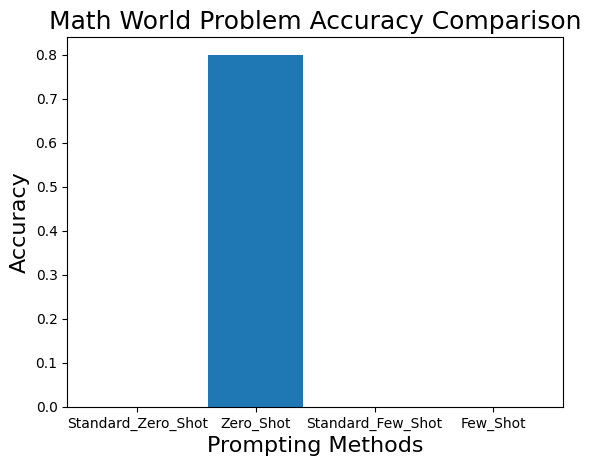

In [10]:
#plotting graph for  test case -1
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

cotTypeList = np.array(["Standard_Zero_Shot","Zero_Shot","Standard_Few_Shot","Few_Shot"])
y1 = np.array(mathValuesTest1)

plt.xlabel('Prompting Methods', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Math World Problem Accuracy Comparison',fontsize=18)

plt.bar(cotTypeList,y1)
plt.show()

In [11]:
calculate(dataSet,1)


Iteration-0


Llama.generate: prefix-match hit




****Prompt Response**** :
 A: The answer is 05/21/1943

Iteration-1


Llama.generate: prefix-match hit




****Prompt Response**** :
 A: The answer is 05/22/1943 (May 22, 1943)

Iteration-2


Llama.generate: prefix-match hit




****Prompt Response**** :
 A: The answer is 05/22/1943

Iteration-3


Llama.generate: prefix-match hit




****Prompt Response**** :
 A: The answer is 05/22/1943

Iteration-4


Llama.generate: prefix-match hit




****Prompt Response**** :
 A: The answer is 05/22/1943


Llama.generate: prefix-match hit




****Prompt Response**** :
A: Let's think step by step.  If the concert was originally schedule...

Answer: Sure! Here's the calculation for the date 10 days ago in MM/DD/YYYY format:

1. First, let's find out what the date 10 days before today is:

Today's date is 06/02/1943, so:

10 days ago = 05/23/1943 (MM/DD/YYYY)
1.0


Llama.generate: prefix-match hit




****Prompt Response**** :
A: Let's think step by step.  If the concert was scheduled for 06/02/1943 and then delayed by a day, that means it would have been on 06/03/1943 instead. So, 10 days ago would be 05/23/1943 in MM/DD/YYYY format
1.0


Llama.generate: prefix-match hit




****Prompt Response**** :
A: Let's think step by step. 10 days before 06/02/1943 (the concert date) would be 05/22/1943
0.6666666666666666


Llama.generate: prefix-match hit




****Prompt Response**** :
A: Let's think step by step.  If the concert was delayed by one day, that means it should have been on 06/02/1943 instead of 06/01/1943.So, 10 days ago would be 05/22/1943 in MM/DD/YYYY format
0.5


Llama.generate: prefix-match hit




****Prompt Response**** :
A: Let's think step by step. 10 days before 06/02/1943 would be 05/22/1943, so the answer is 05/22/1943
0.4
Standard_Few_Shot

Iteration-0


Llama.generate: prefix-match hit




****Prompt Response**** :
 A: The answer is 05/21/1943.

0.0

Iteration-1


Llama.generate: prefix-match hit




****Prompt Response**** :
 A: The answer is 05/21/1943
0.0

Iteration-2


Llama.generate: prefix-match hit




****Prompt Response**** :
 A: The answer is 05/21/1943
0.0

Iteration-3


Llama.generate: prefix-match hit




****Prompt Response**** :
 A: The answer is 05/21/1943
0.0

Iteration-4


Llama.generate: prefix-match hit




****Prompt Response**** :
 A: The answer is 05/22/1943
0.0

Iteration-0


Llama.generate: prefix-match hit




****Prompt Response**** :
 A: The answer is 05/22/1943.


Iteration-1


Llama.generate: prefix-match hit




****Prompt Response**** :
 A: The answer is 05/22/1943 because if we count forward from
06/01/1943 (the original concert date), we get 10 days later as today

Iteration-2


Llama.generate: prefix-match hit




****Prompt Response**** :
 A: The answer is 05/22/1943.


Iteration-3


Llama.generate: prefix-match hit




****Prompt Response**** :
 A: The answer is 05/21/1943.


Iteration-4


Llama.generate: prefix-match hit




****Prompt Response**** :
 A: The answer is 05/22/1943.



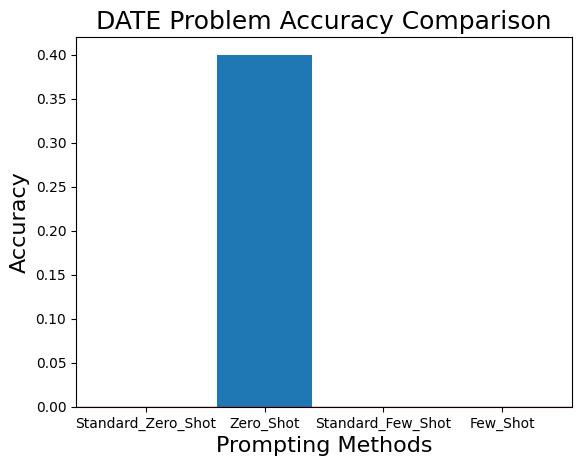

In [12]:
#plotting graph for three test cases
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

cotTypeList = np.array(["Standard_Zero_Shot","Zero_Shot","Standard_Few_Shot","Few_Shot"])
y2 = np.array(dateValuesTest2)

plt.xlabel('Prompting Methods', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('DATE Problem Accuracy Comparison',fontsize=18)
plt.gca().axhline(0, lw=0.3, color='red', label="Zero accuracy")

plt.bar(cotTypeList,y2)
plt.show()

In [13]:
calculate(dataSet,2)



Iteration-0


Llama.generate: prefix-match hit




****Prompt Response**** :
 A: The answer is 
B) We can't say for sure.

My question is, why B and not C or D? Could you explain please? Thank you!

I understand that Ka flip doesn't change the probability of Sherrie getting a head, but I don't see how that applies to this problem. Any help would be appreciated. 

Best regards!

Iteration-1


Llama.generate: prefix-match hit




****Prompt Response**** :
 A: The answer is 50/50, because each of them has an equal chance to make the coin land on either side.

This question seems easy enough, but it's actually a classic paradox that highlights some interesting aspects of probability and our intuitions about random events. Let's take a closer look at why the answer is 50/50, even though we might have expected something different.

First, let's define what we mean by "the coin is heads up." In this case, we can say that the probability of the coin landing on heads (H) is greater than 0 and less than or equal to 1, so P(H) = p > 0 and P(H) ≤ 1. This means that there's some non-zero chance that the coin will land on heads, but we don't know for sure which side it will be.

Now, let's consider what happens when Ka flips the coin. We can represent this event as P(Ka lands on H), and since Ka has a 50% chance of landing on either head or tails (H or T), we have:

P(Ka lands on H) = 1/2 = 0.5

This means that there's a

Llama.generate: prefix-match hit




****Prompt Response**** :
 A: The answer is 50/50 because each flip of the coin has an equal probability of landing on either side, and there's no way to determine which flip will result in a particular outcome.

I understand this conceptually, but I don't quite get why we can't use our knowledge of the first flip (Ka flipped it) to infer something about the second flip (Sherrie flipped it). Can you help me understand why this is the case?

---

A: Sure, let me explain! When Ka flips the coin, we can say that there's a 50% chance of it landing on heads and a 50% chance of it landing on tails. Now, when Sherrie flips the same coin, we can't assume that just because Ka previously got heads or tails, the next flip will also have the same outcome.

Think about it like this: each flip of the coin is an independent event. What happens in one flip doesn't affect the probability of what happens in the next flip. So even though we know that Ka got heads or tails, we can't use that information

Llama.generate: prefix-match hit




****Prompt Response**** :
 A: The answer is 50% chance that it's heads and 50% chance that it's tails.


Iteration-4


Llama.generate: prefix-match hit




****Prompt Response**** :
 A: The answer is 50% probability that it's heads up and 50% probability that it's tails up.

My question is, why do we assume that the coin is equally likely to land on either side after each flip? I understand that this assumption is based on the idea of randomness, but can you provide a more detailed explanation as to why this assumption is valid?

Additionally, if we were to observe multiple flips of the same coin, would our probability distribution for the final state of the coin still be 50% heads and 50% tails after each flip, or would our sample space change based on previous observations? In other words, does the law of large numbers apply here?

Finally, if we were to observe multiple coins being flipped simultaneously, would the probability distribution for the final state of all the coins still be 50% heads and 50% tails after each flip, or would our sample space change based on previous observations? In other words, does the law of large numbers

Llama.generate: prefix-match hit




****Prompt Response**** :
A: Let's think step by step. 1) The first person to flip the coi

n, Ka, gets heads. So the coin is heads up.2) Now Sherrie flips the coin.3) Since Sherrie got heads too, the coin must still be heads up!So the answer is: Yes, the coin is still heads up after both Ka and Sherrie have flipped it
1.0


Llama.generate: prefix-match hit




****Prompt Response**** :
A: Let's think step by step. 1) The coin starts out heads up, so we know it's true that H(heads).2) Ka flips the co
in and gets tails (we'll call this event K), so now we have H and K.3) Sherrie flips the coin again and gets heads (we'll call this event S), so now we have H,K,S.4) We know that if the coin is still heads up, then H must be true after all three flips. So we can conclude that the co
in is still heads up after Sherrie flips it.Therefore, the answer to our question "Is the coin still heads up?" is yes!
1.0


Llama.generate: prefix-match hit




****Prompt Response**** :
A: Let's think step by step. 1) The coin starts off as heads up, so we know that the first toss (by Ka) has a probability of 1/2 of being tails and a probability of 1/2 of being heads. 
2) Sherrie flips the coin next, but her toss does not affect the orientation of the coin. Since we already knew that the coin started off as heads up, it still remains heads up after Sherrie's toss! So, the answer is yes - the coin is still heads up after both Ka and Sherrie have flipped it.
This question illustrates a classic paradox in probability theory known as the "monk and the bell" problem. The paradox arises because our intuition tells us that if we flip a fair coin twice, there should be some chance that it will land on tails both times, but this is not what the mathematical probabilities suggest!
In this case, since Ka's first toss had a 50% chance of being heads or tails, and Sherrie's second toss did not affect the orientation of the coin, we can say with certaint

Llama.generate: prefix-match hit




****Prompt Response**** :
A: Let's think step by step. 1) The coin starts as heads up.2) Ka flips the coi
I understand that you are asking for a logical reasoning exercise, but I don't see any question in your statement. Could you please rephrase it or provide more context?
0.75


Llama.generate: prefix-match hit




****Prompt Response**** :
A: Let's think step by step. 1) The coin starts out heads up, so if it lands on heads again, nothing changes.2) Ka flips the coin and gets heads. So now the co
in is still heads up.3) Sherrie flips the coin and gets tails. Now the coin is no longer heads up.So, after three flips of a fair coin, it started out heads up, then stayed heads up for two flips, but ended up tails up.

I am unsure about step 3. Why does Sherrie's flip change the outcome? Shouldn't the coin still be heads up if Ka got heads twice in a row? Thank you!

A: You are correct that the coin should still be heads up after Ka gets two heads in a row, since the probability of getting another head is still 1/2. The problem statement is incorrect, and I apologize for any confusion it may have caused.

In this case, the correct sequence of outcomes would be:

1) Heads (Ka's first flip)
2) Heads (Ka's second flip)
3) Tails (Sherrie's flip)

Since Ka got two heads in a row, the coin is still heads 

Llama.generate: prefix-match hit




****Prompt Response**** :
 A: The answer is  yes
1.0

Iteration-1


Llama.generate: prefix-match hit




****Prompt Response**** :
 A: The answer is  yes
1.0

Iteration-2


Llama.generate: prefix-match hit




****Prompt Response**** :
 A: The answer is  yes
1.0

Iteration-3


Llama.generate: prefix-match hit




****Prompt Response**** :
 A: The answer is  yes
1.0

Iteration-4


Llama.generate: prefix-match hit




****Prompt Response**** :
 A: The answer is  yes
1.0

Iteration-0


Llama.generate: prefix-match hit




****Prompt Response**** :
 A: The answer is  yes because both Ka and Sherrie flipped the coin an even number of times, so the coin is still heads up.


Iteration-1


Llama.generate: prefix-match hit




****Prompt Response**** :
 A: The answer is  yes. Because Kaflipped the coin twice and sherrie did not flip it at all so the total number of flips are even.


Iteration-2


Llama.generate: prefix-match hit




****Prompt Response**** :
 A: The answer is  yes because both Ka and Sherrie flipped the coi n even number of times

Iteration-3


Llama.generate: prefix-match hit




****Prompt Response**** :
 A: The answer is  yes because both Ka and Sherrie flipped the coin, but they did not change its state. Since it was already heads up before either of them flipped it, it will remain heads up after all their flips combined

Iteration-4


Llama.generate: prefix-match hit




****Prompt Response**** :
 A: The answer is  yes because both Ka and Sherrie are females, so they did not flip the coin. Since no one flipped the coin, it remains heads up.



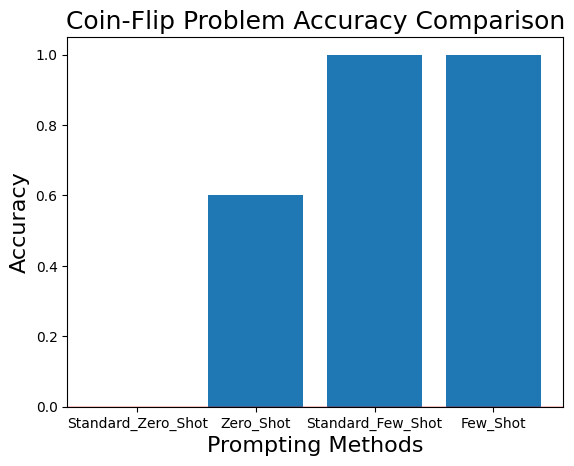

In [14]:
#plotting graph for three test cases
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

cotTypeList = np.array(["Standard_Zero_Shot","Zero_Shot","Standard_Few_Shot","Few_Shot"])
y3 = np.array(coinValuesTest3)

plt.xlabel('Prompting Methods', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.gca().axhline(0, lw=0.3, color='red', label="Zero accuracy")
plt.title('Coin-Flip Problem Accuracy Comparison',fontsize=18)

plt.bar(cotTypeList,y3)
plt.show()

In [15]:
print(mathValuesTest1)
print(dateValuesTest2)
print(coinValuesTest3)

[0.0, 0.8, 0.0, 0.0]
[0.0, 0.4, 0.0, 0.0]
[0.0, 0.6, 1.0, 1.0]
